# Recommendation System

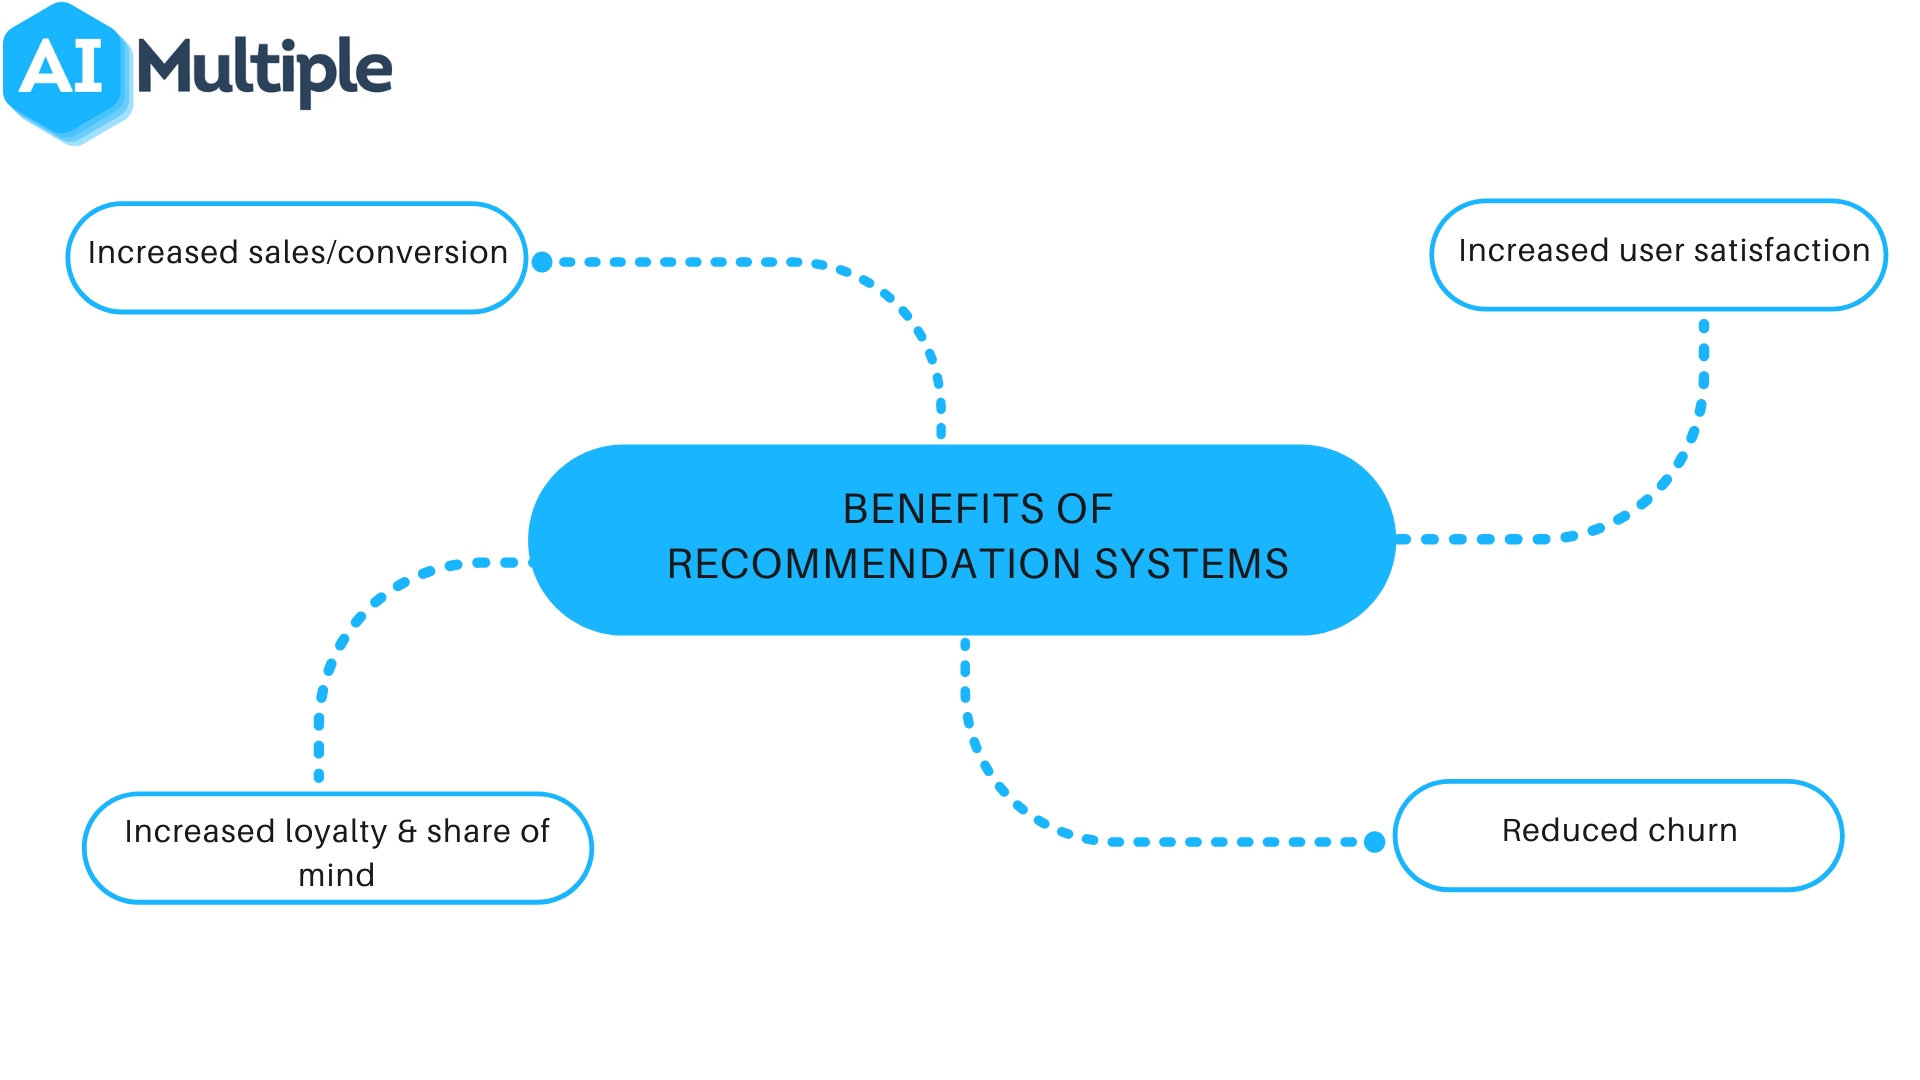

## Commet Configurations

In [1]:
!pip3 install comet_ml

     |████████████████████████████████| 314 kB 5.1 MB/s 
     |████████████████████████████████| 547 kB 54.2 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=cfc508ef3076c7a2057b65ebbf91a64c4398008ae58309008cc9aba02f86be6c
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [2]:
# import comet_ml
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="HfSNpkY9koDD8GCccjV6a7o3K",
    project_name="recommendation-system",
    workspace="mafikengz",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mafikengz/recommendation-system/750cba3156484db58e9182628a050bff



## Import Libraries

In [3]:
#Scientific libraries
import numpy as np 
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Configurations
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [5]:
movies = pd.read_csv("movies.csv")
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('train.csv')
imdb_data = pd.read_csv('imdb_data.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')

FileNotFoundError: ignored

## Data Preprocessing

In [ ]:
movies.head()

In [ ]:
df_train.head()

## Exploratory Data Analysis (EDSA)

In [ ]:
userid = pd.Series(df_train['userId'])
movieid = pd.Series(df_train['movieId'])
ratings = pd.Series(df_train['rating'])
title = pd.Series(movies['title'])

data = pd.concat([userid , movieid , ratings , title], axis=1 )

In [ ]:
data.head()

In [ ]:
movie_rating = pd.DataFrame(data.groupby('title')['rating'].mean().sort_values(ascending=False))
movie_rating['count'] = pd.DataFrame(data.groupby('title')['rating'].count().sort_values(ascending=False))

In [ ]:
movie_rating.head()

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(movie_rating['rating'])
plt.ylabel('Count')
plt.xlabel('Ratings')

In [ ]:
data.groupby('title')['userId'].count().sort_values(ascending=False).head()

In [ ]:
data['userId'].value_counts()